### Задание 1

In [3]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [4]:
boston = load_boston()
data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 100)

In [5]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


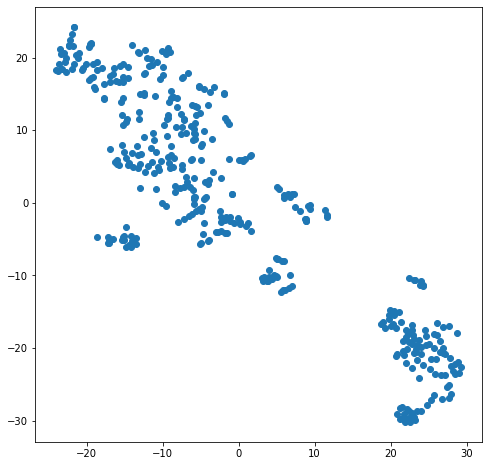

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

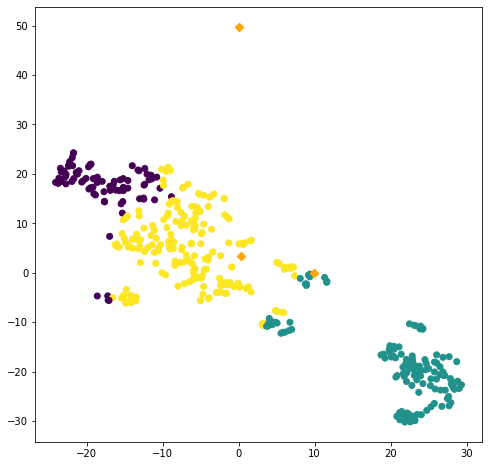

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.figure(figsize=(8, 8))

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='orange')

plt.show()

In [9]:
# price

# как убрать dtype в out[]??
print('Кластер 1:', y_train[labels_train == 0].mean())
print('Кластер 2:', y_train[labels_train == 1].mean())
print('Кластер 3:', y_train[labels_train == 2].mean())

Кластер 1: price    28.93038
dtype: float64
Кластер 2: price    16.478906
dtype: float64
Кластер 3: price    24.081726
dtype: float64


In [10]:
# CRIM

print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.07098911392405063
Кластер 1: 9.86817328125
Кластер 2: 0.3492894923857869


### Задание 3

In [11]:
labels_test = kmeans.predict(X_test_scaled)

In [12]:
# price

print('Кластер 1:', y_test[labels_test == 0].mean())
print('Кластер 2:', y_test[labels_test == 1].mean())
print('Кластер 3:', y_test[labels_test == 2].mean())

Кластер 1: price    26.8
dtype: float64
Кластер 2: price    15.391667
dtype: float64
Кластер 3: price    25.462222
dtype: float64


In [13]:
# CRIM

print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.0689357142857143
Кластер 1: 12.904660555555559
Кластер 2: 0.5529586666666668
